# Multiclass Classification
Class labels : Scissors,Rock,Hands
In this exercise we will do multiclass classification .

In [1]:
#Importing needed library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import zipfile
%matplotlib inline

In [2]:
validation_dir='dataset/train-valid/validation'
validation_paper=os.listdir(validation_dir+"/paper")
validation_rock=os.listdir(validation_dir+"/rock")
validation_scissors=os.listdir(validation_dir+"/scissors")


train_dir='dataset/train-valid/train'
train_paper=os.listdir(train_dir+"/paper")
train_rock=os.listdir(train_dir+"/rock")
train_scissors=os.listdir(train_dir+"/scissors")

# Data set details

In [3]:
print("Training data ")

print("Paper training items :",len(train_paper))
print("Rock training items :",len(train_rock))
print("Scissors training items :",len(train_scissors),"\n\n")

print("Validation data ")

print("Paper validation items :",len(validation_paper))
print("Rock validation items :",len(validation_rock))
print("Scissors validation items :",len(validation_scissors))

Training data 
Paper training items : 840
Rock training items : 840
Scissors training items : 840 


Validation data 
Paper validation items : 124
Rock validation items : 124
Scissors validation items : 124


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
training_datagen=ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

validation_datagen=ImageDataGenerator(
                    rescale=1./255)

In [6]:
validation_dir='dataset/train-valid/validation'
train_dir='dataset/train-valid/train'

In [7]:
train_generator=training_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    class_mode='categorical')



validation_generator=validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150,150),
                    class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [8]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(2,2),activation='relu',input_shape=(150,150,3)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                tf.keras.layers.Conv2D(32,(2,2),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                  
                                 tf.keras.layers.Conv2D(64,(2,2),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                  
                                 tf.keras.layers.Conv2D(128,(2,2),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                  
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(3,activation='softmax')
                                 ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 149, 149, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       3

In [9]:
from  tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [10]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=3,verbose=2)
model.save('model.h5')

Epoch 1/3
79/79 - 66s - loss: 1.1814 - accuracy: 0.4294 - val_loss: 0.6685 - val_accuracy: 0.7930
Epoch 2/3
79/79 - 64s - loss: 0.7757 - accuracy: 0.6540 - val_loss: 0.3607 - val_accuracy: 0.9409
Epoch 3/3
79/79 - 65s - loss: 0.6131 - accuracy: 0.7393 - val_loss: 0.2695 - val_accuracy: 0.9328


# Accuracy


<Figure size 432x288 with 0 Axes>

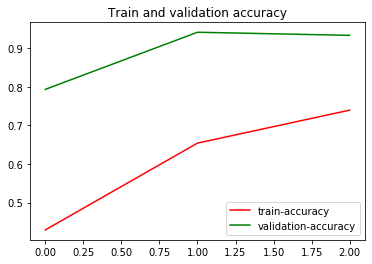

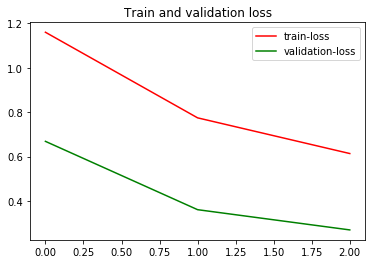

<Figure size 432x288 with 0 Axes>

In [11]:
validation_accuracy=history.history['val_accuracy']
train_accuracy=history.history['accuracy']

validation_loss=history.history['val_loss']
train_loss=history.history['loss']

epochs=range(len(train_accuracy))

plt.plot(epochs,train_accuracy,'r',label='train-accuracy')
plt.plot(epochs,validation_accuracy,'g',label='validation-accuracy')
plt.title("Train and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs,train_loss,'r',label='train-loss')
plt.plot(epochs,validation_loss,'g',label='validation-loss')
plt.title("Train and validation loss")
plt.legend()
plt.figure()

In [12]:
test_dir='dataset/test'
test_image_names=os.listdir(test_dir)

In [45]:
#labels
labels = (train_generator.class_indices)
print(labels)
#Reverse the dictionary
print("Reverse the dictionary")
labels = dict(map(reversed, labels.items()))
print(labels)

{'paper': 0, 'rock': 1, 'scissors': 2}
Reverse the dictionary
{0: 'paper', 1: 'rock', 2: 'scissors'}


In [54]:
from keras.preprocessing import image


for image_name in test_image_names:
    location=test_dir+"/"+image_name
    img = image.load_img(location, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    predict=model.predict(images)
    print(image_name," ",classes," ",predict,labels[classes[0]])

paper-hires1.png   [0]   [[1. 0. 0.]] paper
paper-hires2.png   [0]   [[1. 0. 0.]] paper
paper1.png   [0]   [[1. 0. 0.]] paper
paper2.png   [0]   [[1. 0. 0.]] paper
paper3.png   [2]   [[0.01907144 0.         0.9809286 ]] scissors
paper4.png   [0]   [[1. 0. 0.]] paper
paper5.png   [0]   [[1. 0. 0.]] paper
paper6.png   [0]   [[1. 0. 0.]] paper
paper7.png   [0]   [[1. 0. 0.]] paper
paper8.png   [0]   [[1. 0. 0.]] paper
paper9.png   [0]   [[0.99183184 0.         0.00816823]] paper
rock-hires1.png   [1]   [[0. 1. 0.]] rock
rock-hires2.png   [1]   [[0. 1. 0.]] rock
rock1.png   [1]   [[0. 1. 0.]] rock
rock2.png   [1]   [[0. 1. 0.]] rock
rock3.png   [1]   [[0. 1. 0.]] rock
rock4.png   [1]   [[0. 1. 0.]] rock
rock5.png   [1]   [[0. 1. 0.]] rock
rock6.png   [1]   [[0. 1. 0.]] rock
rock7.png   [1]   [[0. 1. 0.]] rock
rock8.png   [1]   [[0. 1. 0.]] rock
rock9.png   [1]   [[0. 1. 0.]] rock
scissors-hires1.png   [2]   [[0. 0. 1.]] scissors
scissors-hires2.png   [2]   [[0. 0. 1.]] scissors
scissors1.p